In [10]:
from CV.nn.conv.LeNet import LeNet
from keras.optimizers import SGD
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras import backend as K
from CV.preprocessing.ImageToArrayPreprocessor import ImageToArrayPreprocessor
from CV.preprocessing.SimplePreprocessor import SimplePreprocessor
from CV.datasets.SimpleDatasetLoader import SimpleDatasetLoader
from CV.nn.conv.ShallowNet import ShallowNet
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
from keras.optimizers import Adam
from CV.nn.conv.alexnet import AlexNet
import argparse 
import random
from CV.nn.conv.MiniVGGNet import MiniVGGNet
'''
# construct the argument parse and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-d", "--dataset", required=True,
help="path to the input data")
args = vars(ap.parse_args())

print("[info] loading images...")'''
#imagePaths = list(paths.list_images(args["dataset"]))
#imagePaths = list(paths.list_images("C:/Users/HOU/Documents/practical_bundle/data3/"))
imagePaths = list(paths.list_images("C:/Users/HOU/Documents/datasets/output_new/"))


size =128

sp = SimplePreprocessor(size,size)
iap = ImageToArrayPreprocessor()

sdl = SimpleDatasetLoader(preprocessors=[sp, iap])
(data, labels) = sdl.load(imagePaths, verbose=500)

data = data-255.0
data = data.astype("float") / 50.0
#if K.image_data_format() == "channels_first":
#    data = data.reshape(data.shape[0],1,28,28)
#else:
#    data = data.reshape(data.shape[0], 28, 28, 1)
    

(train_X, test_X, train_y, test_y) = train_test_split(data,
                               labels, test_size=0.2,
                                                     random_state=7)


from keras.utils import to_categorical
lb = LabelBinarizer()
#train_y = lb.fit_transform(train_y)
#test_y = lb.fit_transform(test_y)
lb.fit(train_y)
train_y=lb.transform(train_y)
test_y = lb.transform(test_y)
train_y = to_categorical(train_y, num_classes=2)
test_y = to_categorical(test_y, num_classes=2)

[INFO] processed 500/2949
[INFO] processed 1000/2949
[INFO] processed 1500/2949
[INFO] processed 2000/2949
[INFO] processed 2500/2949


In [19]:
# # Normalize the data: subtract the mean image
# data.shape[0]
# mean = np.mean(data,axis=0)
# for i in range(data.shape[0]):
#     data[i] = data[i] - mean
test_X.shape

(483, 128, 128, 3)

[INFO] compiling model...
[INFO] training network...
Train on 2359 samples, validate on 590 samples
Epoch 1/5
2359/2359 [==============================] - 368s 156ms/step - loss: 1.0318 - acc: 0.6448 - val_loss: 0.8669 - val_acc: 0.6424
Epoch 2/5
2359/2359 [==============================] - 360s 153ms/step - loss: 0.4020 - acc: 0.8156 - val_loss: 0.5707 - val_acc: 0.7729
Epoch 3/5
2359/2359 [==============================] - 359s 152ms/step - loss: 0.2170 - acc: 0.9131 - val_loss: 0.3687 - val_acc: 0.8525
Epoch 4/5
2359/2359 [==============================] - 360s 153ms/step - loss: 0.1088 - acc: 0.9614 - val_loss: 0.3219 - val_acc: 0.8746
Epoch 5/5
2359/2359 [==============================] - 361s 153ms/step - loss: 0.0742 - acc: 0.9712 - val_loss: 0.5911 - val_acc: 0.8153
[INFO] evaluating network...
                                              precision    recall  f1-score   support

C:/Users/HOU/Documents/datasets/output_new/0       0.96      0.61      0.75       264
C:/Users/HOU/

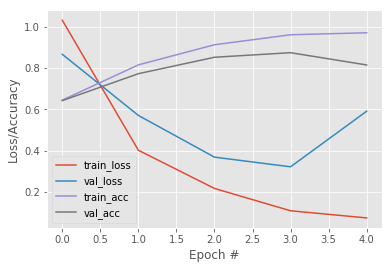

In [12]:
from keras.applications import ResNet50
from keras.applications import InceptionV3
from keras.applications import Xception # TensorFlow ONLY
from keras.applications import VGG16
from keras.applications import VGG19
#lb = LabelBinarizer()
#train_y = lb.fit_transform(train_y)
#test_y = lb.fit_transform(test_y)

EPOCHS = 5
INIT_LR = 1e-3
BS =128
# initialize the optimizer and model
print("[INFO] compiling model...")
opt = SGD(lr=0.01, decay=0.01/EPOCHS, momentum=0.9,nesterov=True)
#opt = Adam(lr=0.01, decay=0.05 / 25)
#opt = SGD(lr=0.005)
#opt = SGD(lr=0.05, decay=0.05/20, momentum=0.9,nesterov=True)
model = MiniVGGNet.build(width=size, height=size, depth=3, classes=2)
#model = AlexNet.build(width=128, height=128, depth=3, classes=2)
model.compile(loss="categorical_crossentropy", optimizer=opt,#binary_crossentropy#categorical_crossentropy
metrics=["accuracy"])

# train the network
print("[INFO] training network...")
H = model.fit(train_X, train_y,validation_data=(test_X, test_y),
    batch_size=BS, epochs=EPOCHS, verbose=1)

# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(test_X, batch_size=BS)
print(classification_report(test_y.argmax(axis=1),predictions.argmax(axis=1),
      target_names=[str(x) for x in lb.classes_]))

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, EPOCHS), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, EPOCHS), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, EPOCHS), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, EPOCHS), H.history["val_acc"], label="val_acc")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

In [65]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
activation_13 (Activation)   (None, 64, 64, 32)        0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 64, 64, 32)        128       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 64, 64, 32)        9248      
_________________________________________________________________
activation_14 (Activation)   (None, 64, 64, 32)        0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 64, 64, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 32, 32)        0         
__________

In [66]:
model.input

<tf.Tensor 'conv2d_9_input:0' shape=(?, 64, 64, 3) dtype=float32>

In [67]:
dict([(layer.name, layer) for layer in model.layers[1:]])

{'activation_13': <keras.layers.core.Activation at 0x1be8f619b00>,
 'batch_normalization_11': <keras.layers.normalization.BatchNormalization at 0x1be8f619cc0>,
 'conv2d_10': <keras.layers.convolutional.Conv2D at 0x1be8f619ef0>,
 'activation_14': <keras.layers.core.Activation at 0x1be8f617d68>,
 'batch_normalization_12': <keras.layers.normalization.BatchNormalization at 0x1bfcc097f28>,
 'max_pooling2d_3': <keras.layers.pooling.MaxPooling2D at 0x1bfcbebcf60>,
 'dropout_7': <keras.layers.core.Dropout at 0x1be8f386160>,
 'conv2d_11': <keras.layers.convolutional.Conv2D at 0x1be8f796da0>,
 'activation_15': <keras.layers.core.Activation at 0x1be8f7d38d0>,
 'batch_normalization_13': <keras.layers.normalization.BatchNormalization at 0x1be8f776d68>,
 'conv2d_12': <keras.layers.convolutional.Conv2D at 0x1be8f7767f0>,
 'activation_16': <keras.layers.core.Activation at 0x1bf1b2334e0>,
 'batch_normalization_14': <keras.layers.normalization.BatchNormalization at 0x1bf1b2b5978>,
 'dropout_8': <keras.l

In [91]:
'''Visualization of the filters of VGG16, via gradient ascent in input space.
This script can run on CPU in a few minutes.
Results example: http://i.imgur.com/4nj4KjN.jpg
'''
from __future__ import print_function

from scipy.misc import imsave
import numpy as np
import time
from keras.applications import vgg16
from keras import backend as K

# dimensions of the generated pictures for each filter.
img_width = 64
img_height = 64

# the name of the layer we want to visualize
# (see model definition at keras/applications/vgg16.py)
layer_name = 'conv2d_12'

# util function to convert a tensor into a valid image


def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + K.epsilon())
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    if K.image_data_format() == 'channels_first':
        x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

# build the VGG16 network with ImageNet weights
print('Model loaded.')

model.summary()

# this is the placeholder for the input images
input_img = model.input

# get the symbolic outputs of each "key" layer (we gave them unique names).
layer_dict = dict([(layer.name, layer) for layer in model.layers[1:]])


def normalize(x):
    # utility function to normalize a tensor by its L2 norm
    return x / (K.sqrt(K.mean(K.square(x))) + K.epsilon())


kept_filters = []
for filter_index in range(64):
    # we only scan through the first 200 filters,
    # but there are actually 512 of them
    print('Processing filter %d' % filter_index)
    start_time = time.time()

    # we build a loss function that maximizes the activation
    # of the nth filter of the layer considered
    layer_output = layer_dict[layer_name].output
    if K.image_data_format() == 'channels_first':
        loss = K.mean(layer_output[:, filter_index, :, :])
    else:
        loss = K.mean(layer_output[:, :, :, filter_index])

    # we compute the gradient of the input picture wrt this loss
    grads = K.gradients(loss, input_img)[0]

    # normalization trick: we normalize the gradient
    grads = normalize(grads)

    # this function returns the loss and grads given the input picture
    iterate = K.function([input_img], [loss, grads])

    # step size for gradient ascent
    step = 1.

    # we start from a gray image with some random noise
    if K.image_data_format() == 'channels_first':
        input_img_data = np.random.random((1, 3, img_width, img_height))
    else:
        input_img_data = np.random.random((1, img_width, img_height, 3))
    input_img_data = (input_img_data - 0.5) * 60 + 64
    

    # we run gradient ascent for 20 steps
    for i in range(20):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step

        print('Current loss value:', loss_value)
        if loss_value <= 0.:
            # some filters get stuck to 0, we can skip them
            break

    # decode the resulting input image
    if loss_value > 0:
        img = deprocess_image(input_img_data[0])
        kept_filters.append((img, loss_value))
    end_time = time.time()
    print('Filter %d processed in %ds' % (filter_index, end_time - start_time))


Model loaded.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
activation_13 (Activation)   (None, 64, 64, 32)        0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 64, 64, 32)        128       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 64, 64, 32)        9248      
_________________________________________________________________
activation_14 (Activation)   (None, 64, 64, 32)        0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 64, 64, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 32, 32)        0      

Current loss value: -4675.2915
Filter 13 processed in 6s
Processing filter 14
Current loss value: -3542.5234
Filter 14 processed in 5s
Processing filter 15
Current loss value: -1028.4653
Filter 15 processed in 6s
Processing filter 16
Current loss value: 5775.259
Current loss value: 5874.16
Current loss value: 5973.072
Current loss value: 6072.009
Current loss value: 6170.9873
Current loss value: 6269.9756
Current loss value: 6368.9844
Current loss value: 6468.04
Current loss value: 6567.133
Current loss value: 6666.2817
Current loss value: 6765.4775
Current loss value: 6864.6855
Current loss value: 6963.9585
Current loss value: 7063.3047
Current loss value: 7162.71
Current loss value: 7262.166
Current loss value: 7361.627
Current loss value: 7461.184
Current loss value: 7560.8037
Current loss value: 7660.4697
Filter 16 processed in 6s
Processing filter 17
Current loss value: -1433.4608
Filter 17 processed in 6s
Processing filter 18
Current loss value: -3846.3403
Filter 18 processed in 

Current loss value: 838.08984
Current loss value: 869.3434
Current loss value: 900.12305
Current loss value: 930.6308
Current loss value: 960.87585
Current loss value: 990.8953
Current loss value: 1020.55597
Current loss value: 1050.0554
Current loss value: 1079.3867
Current loss value: 1108.5444
Current loss value: 1137.5132
Current loss value: 1166.1263
Current loss value: 1194.4976
Current loss value: 1222.5474
Current loss value: 1250.3654
Current loss value: 1278.034
Current loss value: 1305.3038
Current loss value: 1332.4664
Current loss value: 1359.3301
Current loss value: 1386.054
Filter 47 processed in 7s
Processing filter 48
Current loss value: -3120.605
Filter 48 processed in 6s
Processing filter 49
Current loss value: -6840.5244
Filter 49 processed in 6s
Processing filter 50
Current loss value: -5997.802
Filter 50 processed in 6s
Processing filter 51
Current loss value: -5268.014
Filter 51 processed in 6s
Processing filter 52
Current loss value: -3854.1611
Filter 52 process

In [92]:

# we will stich the best 64 filters on a 8 x 8 grid.
n = 4

# the filters that have the highest loss are assumed to be better-looking.
# we will only keep the top 64 filters.
kept_filters.sort(key=lambda x: x[1], reverse=True)
kept_filters = kept_filters[:n * n]

# build a black picture with enough space for
# our 8 x 8 filters of size 128 x 128, with a 5px margin in between
margin =1
width = n * img_width + (n - 1) * margin
height = n * img_height + (n - 1) * margin
stitched_filters = np.zeros((width, height, 3))

# fill the picture with our saved filters
for i in range(n):
    for j in range(n):
        img, loss = kept_filters[i * n + j]
        stitched_filters[(img_width + margin) * i: (img_width + margin) * i + img_width,
                         (img_height + margin) * j: (img_height + margin) * j + img_height, :] = img

# save the result to disk
imsave('64stitched_filters3_%dx%d.png' % (n, n), stitched_filters)

C:\Users\HOU\Anaconda3\envs\tensorflow_gpu\lib\site-packages\ipykernel_launcher.py:25: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


In [13]:
from CV.nn.conv.LeNet import LeNet
from keras.optimizers import SGD
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras import backend as K
from CV.preprocessing.ImageToArrayPreprocessor import ImageToArrayPreprocessor
from CV.preprocessing.SimplePreprocessor import SimplePreprocessor
from CV.datasets.SimpleDatasetLoader import SimpleDatasetLoader
from CV.nn.conv.ShallowNet import ShallowNet
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
from keras.optimizers import Adam
import argparse 
from CV.nn.conv.MiniVGGNet import MiniVGGNet
imagePaths = list(paths.list_images("C:/Users/HOU/Documents/datasets/output_new_test/"))
#imagePaths = list(paths.list_images("C:/Users/HOU/Documents/datasets/05s_he/"))

sp = SimplePreprocessor(size,size)
iap = ImageToArrayPreprocessor()

sdl = SimpleDatasetLoader(preprocessors=[sp, iap])
(data, labels) = sdl.load(imagePaths, verbose=500)

data = data-255.0
data = data.astype("float") / 50
#if K.image_data_format() == "channels_first":
#    data = data.reshape(data.shape[0],1,28,28)
#else:
#    data = data.reshape(data.shape[0], 28, 28, 1)
    

(train_X, test_X, train_y, test_y) = train_test_split(data,
                               labels, test_size=.8,
                                                     random_state=21)

from keras.utils import to_categorical
lb = LabelBinarizer()
#train_y = lb.fit_transform(train_y)
#test_y = lb.fit_transform(test_y)
lb.fit(train_y)
train_y=lb.transform(train_y)
test_y = lb.transform(test_y)
train_y = to_categorical(train_y, num_classes=2)
test_y = to_categorical(test_y, num_classes=2)


#lb = LabelBinarizer()
#train_y = lb.fit_transform(train_y)
#test_y = lb.fit_transform(test_y)

# initialize the optimizer and model
#print("[INFO] compiling model...")
#opt = SGD(lr=0.01, decay=0.01/40, momentum=0.9,nesterov=True)
#opt = Adam(lr=0.05, decay=0.05 / 25)
#opt = SGD(lr=0.05)
#opt = SGD(lr=0.05, decay=0.05/20, momentum=0.9,nesterov=True)
#model = MiniVGGNet.build(width=28, height=28, depth=3, classes=2)
#model.compile(loss="binary_crossentropy", optimizer=opt,
#metrics=["accuracy"])

# train the network
#print("[INFO] training network...")
#H = model.fit(train_X, train_y,# validation_data=(test_X, test_y),
#    batch_size=BS, epochs=EPOCHS, verbose=1)

# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(test_X, batch_size=BS)
print(classification_report(test_y.argmax(axis=1),predictions.argmax(axis=1),
      target_names=[str(x) for x in lb.classes_]))

[INFO] processed 500/603
[INFO] evaluating network...
                                                   precision    recall  f1-score   support

C:/Users/HOU/Documents/datasets/output_new_test/0       0.33      0.29      0.30       237
C:/Users/HOU/Documents/datasets/output_new_test/1       0.38      0.43      0.40       246

                                      avg / total       0.35      0.36      0.36       483



In [43]:
train_X.shape

(116, 28, 28, 3)

[INFO] evaluating network...
                                                                precision    recall  f1-score   support

C:/Users/HOU/Documents/practical_bundle/TrainSet/05s_filter/00       0.29      0.07      0.12        55
C:/Users/HOU/Documents/practical_bundle/TrainSet/05s_filter/11       0.50      0.84      0.63        61

                                                   avg / total       0.40      0.47      0.38       116

